# 1. BUSINESS UNDERSTANDING

Ingin mengklaster mobil-mobil sesuai dengan bensin yang dihabiskan dengan harga mobil tersebut untuk mengklaster mobil dengan klaster hemat, sedang, dan boros.

# 2. DATA UNDERSTANDING

### 1. IMPORT LIBRARY

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

### 2. LOAD DATA

Memasukkan dataset automobile.

In [3]:
losses=pd.read_csv('automobile-losses.csv')
risk=pd.read_csv('automobile-risk.csv')
spec=pd.read_csv('automobile-spec.csv')
# losses
# risk
# spec

### 2.1. Join 3 tables using ID

Menggabungkan seluruh tabel.

In [4]:
#join losses and risk
tab1=pd.merge(losses,risk,how='left',on='ID')
tab_join=pd.merge(tab1,spec, how='left', on='ID')
tab_join.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 2.2. Quick-look (dimension, data type, head/tail, summary statistics, etc)

Melihat karakteristik dari tabel yang telah dijoin.

In [5]:
# dimension
tab_join.shape

(205, 27)

In [6]:
# data type
tab_join.dtypes

ID                     int64
normalized-losses    float64
symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [7]:
# summary statistic
tab_join.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 3. DATA PREPARATION

### 3.1. Missing value handling.

**Indentify data missing dahulu.**

In [8]:
#count how many 
count_missing = tab_join.isnull().sum().sort_values(ascending = False)
count_missing.head(10)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
wheel-base            0
symboling             0
make                  0
dtype: int64

In [9]:
#count how much the percentage of missing value for each field
percentage = round(tab_join.isnull().sum()/len(tab_join)*100,2).sort_values(ascending = False)
percentage.head(10)

normalized-losses    20.00
price                 1.95
stroke                1.95
bore                  1.95
peak-rpm              0.98
horsepower            0.98
num-of-doors          0.49
wheel-base            0.00
symboling             0.00
make                  0.00
dtype: float64

**Mengisi data missing menggunakan modus dan median.**

In [10]:
# fill the missing value
# kategorik menggunakan modus, numerik menggunakan median.
median1=tab_join['normalized-losses'].median()
tab_join['normalized-losses'] = tab_join['normalized-losses'].fillna(median1)

median2=tab_join['price'].median()
tab_join['price'] = tab_join['price'].fillna(median2)

median3=tab_join['stroke'].median()
tab_join['stroke'] = tab_join['stroke'].fillna(median3)

median4=tab_join['bore'].median()
tab_join['bore'] = tab_join['bore'].fillna(median4)

median5=tab_join['peak-rpm'].median()
tab_join['peak-rpm'] = tab_join['peak-rpm'].fillna(median5)

median6=tab_join['horsepower'].median()
tab_join['horsepower'] = tab_join['horsepower'].fillna(median6)

modus=tab_join['num-of-doors'].mode().values[0]
tab_join['num-of-doors'] = tab_join['num-of-doors'].fillna(modus)

In [11]:
#count how many missing null 
count_missing = tab_join.isnull().sum().sort_values(ascending = False)
count_missing.head(10)

price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
dtype: int64

**Memilih feature yang akan digunakan.**

In [12]:
# mengambil dua variabel untuk diklastering, yaitu make dan price
ts=pd.DataFrame()
ts=tab_join[['city-mpg','price']]
ts.head()

,city-mpg,price
0,21,13495.0
1,21,16500.0
2,19,16500.0
3,24,13950.0
4,18,17450.0


### 3.2. VISUALISASI DATA SET CARS UNTUK MELIHAT OUTLIER

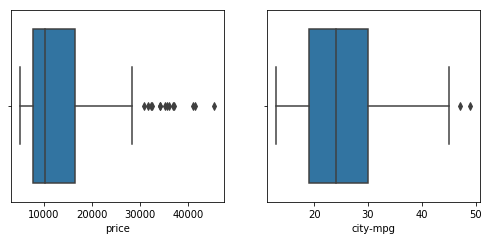

In [14]:
f=plt.figure(figsize=(13,12))
f.add_subplot(3,3,1)
sns.boxplot(ts['price'],orient = "h")
f.add_subplot(3,3,2)
sns.boxplot(ts['city-mpg'],orient = "h")

Data meanPrice memiliki dua outlier. Namun, hal ini masih ditoleransi karena outlier hanya sedikit sehingga diasumsikan tidak akan terlalu banyak memengaruhi hasil klastering.

# 4. DATA MODELING

**Memasukkan data ke dalam array untuk selanjutnya dilakukan clustering menggunakan beberapa model**.

In [16]:
X = np.asarray(ts)

### K-MEANS

##### PROSES MENGHITUNG

Text(0.5,1,'Grafik Harga Mobil Sesuai Pengeluaran Bensin')

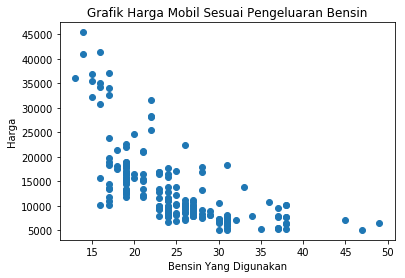

In [18]:
# Step 1. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Bensin Yang Digunakan")
plt.ylabel("Harga")
plt.title("Grafik Harga Mobil Sesuai Pengeluaran Bensin")

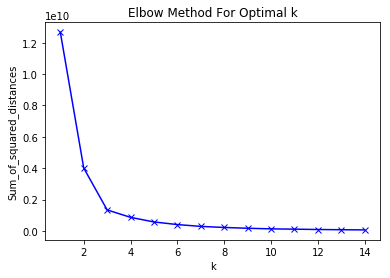

In [19]:
# Step 2. Menentukan besar K menggunakan scree plot
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# Step 3. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
# Step 4. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

# [[cluster, pengeluarannya]]

[[2.85000000e+01 8.46534127e+03]
 [1.66875000e+01 3.49976875e+04]
 [2.08253968e+01 1.69716984e+04]]


In [40]:
# Step 5. Menampilkan hasil klastering
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1
 1 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 1 1 1 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0
 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2]


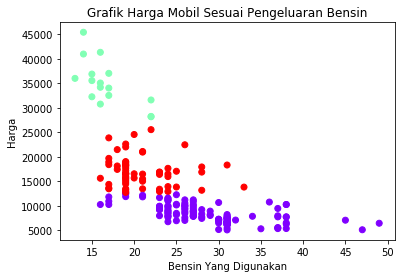

In [41]:
# Step 6. Visualisasi hasil klastering 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Bensin Yang Digunakan")
plt.ylabel("Harga")
plt.title("Grafik Harga Mobil Sesuai Pengeluaran Bensin")
plt.show()

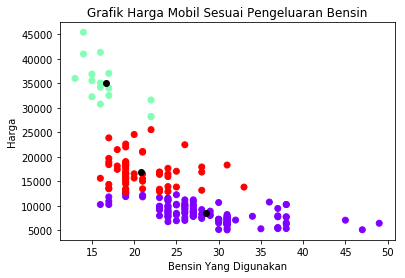

In [42]:
# Step 7. Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Bensin Yang Digunakan")
plt.ylabel("Harga")
plt.title("Grafik Harga Mobil Sesuai Pengeluaran Bensin")
plt.show()

In [43]:
# Step 8. Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

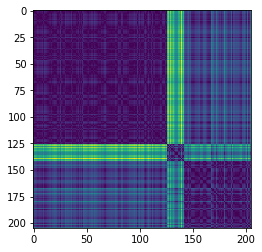

In [44]:
# Step 9. Membuat similarity Matrix 
# untuk melihat klaster yang didapat
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [45]:
# Step 10. Menggabungkan cluster ke dalam dataset
ts['cluster']=kmeans.labels_
ts.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,city-mpg,price,cluster
0,21,13495.0,2
1,21,16500.0,2
2,19,16500.0,2
3,24,13950.0,2
4,18,17450.0,2


In [46]:
# Step 11. Menghitung jumlah cluster yang didapat
ts.groupby('cluster').count()

,city-mpg,price
cluster,,
0,126,126
1,16,16
2,63,63


##### GET INSIGHT TO DEFINE CLUSTER

In [31]:
# mean city-mpg dan price
cars=ts.groupby('cluster').mean()
cars

,city-mpg,price
cluster,,
0,28.500000,8465.341270
1,16.687500,34997.687500
2,20.825397,16971.698413


In [32]:
# min city-mpg dan price
cars=ts.groupby('cluster').min()
cars

,city-mpg,price
cluster,,
0,16,5118.0
1,13,28176.0
2,16,12764.0


In [33]:
# max city-mpg dan price
cars=ts.groupby('cluster').max()
cars

,city-mpg,price
cluster,,
0,49,12629.0
1,22,45400.0
2,33,25552.0


Dari hasil mean, min, dan max nilai setiap feature dapat diketahui bahwa:
    1. Cluster 0 adalah **Mobil hemat** dengan rata-rata price 8465 dan city-mpg 28,5
    2. Cluster 1 adalah **Mobil boros** dengan rata-rata price 34997 dan city-mpg 16,68
    3. Cluster 2 adalah **Mobil sedang** dengan rata-rata price 16971 dan city-mpg 20,82

### HIERARKI

##### PROSES MENGHITUNG 

MELIHAT DENDOGRAM DENGAN SETIAP METHOD

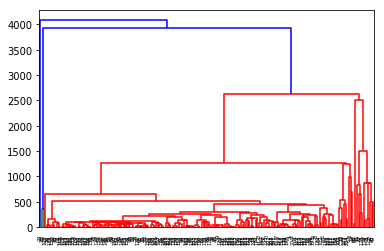

In [47]:
# Step 1. Menampilkan dendrogram untuk melihat klastering yang pas
dendrogram1 = sch.dendrogram(sch.linkage(X, method='single'))

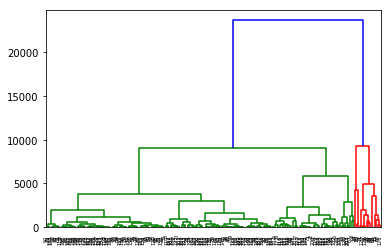

In [48]:
dendrogram2 = sch.dendrogram(sch.linkage(X, method='average'))

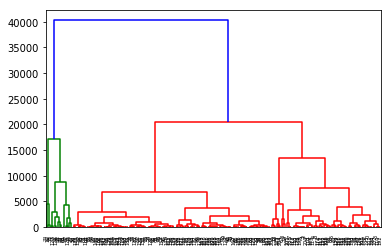

In [49]:
dendrogram3 = sch.dendrogram(sch.linkage(X, method='complete'))

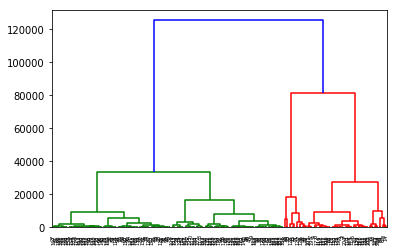

In [50]:
dendrogram4 = sch.dendrogram(sch.linkage(X, method='ward'))

Metode yang paling make sense digunakan adalah ward, karena perbandingan clusteringnya lebih balance.

In [51]:
# Step 2. Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

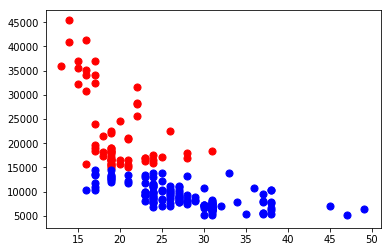

In [52]:
# Step 3. Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

##### GET INSIGHT

Dari hasil di atas dapat diketahui bahwa memiliki dua klaster:
    1. Cluster biru adalah **Mobil hemat**
    2. Cluster merah adalah **Mobil boros**

### DBSCAN

##### PROSES MENGHITUNG

In [83]:
# Step 1. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=1500, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [84]:
# Step 2. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1
  1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0]


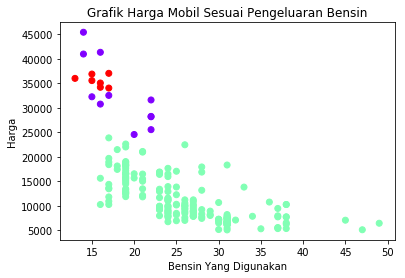

In [85]:
# Step 3. Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Bensin Yang Digunakan")
plt.ylabel("Harga")
plt.title("Grafik Harga Mobil Sesuai Pengeluaran Bensin")
plt.show()

Dari grafik di atas, terlihat bahwa terdapat dua klaster berwarna hijau dan merah.

### 4. Perform visualization using at least 5 difference visualization technique (barplot, scatter plot, area, boxplot, pie chart, line chart, etc)

([<matplotlib.patches.Wedge at 0x2b320ae45c0>,
 [Text(-1.04874,0.331893,'gas'), Text(1.04874,-0.331893,'diesel')],
 [Text(-0.572038,0.181032,'90.2%'), Text(0.572038,-0.181032,'9.8%')])

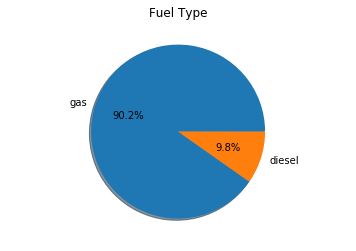

In [12]:
# comparison fuel type
count=tab_join['fuel-type'].value_counts()
lab=['gas','diesel']
plt.title('Fuel Type')
plt.axis('equal')
plt.pie(count, labels=lab, autopct='%1.1f%%', shadow=True, counterclock=True)

In [13]:
# mean of price of each brand
merk=tab_join[['make', 'price']]
top_merk=merk.groupby('make').mean().sort_values('price',ascending=False).head(5)
top_merk

,price
make,
jaguar,34600.000000
mercedes-benz,33647.000000
porsche,27179.400000
bmw,26118.750000
volvo,18063.181818


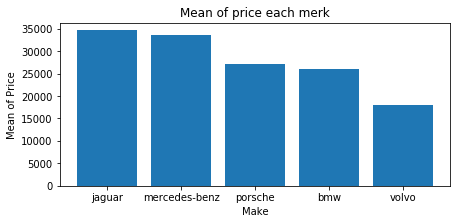

In [14]:
plt.figure(figsize=(7,3))

x=range(5)
plt.bar(x,top_merk['price'])
plt.xticks(x,top_merk.index)
plt.xlabel('Make')
plt.ylabel('Mean of Price')
plt.title('Mean of price each merk')
plt.show()

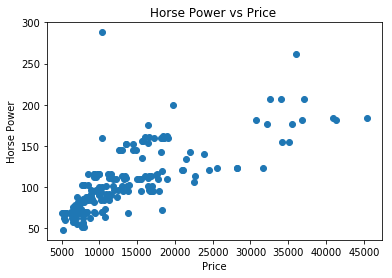

In [15]:
# scatterplot Horse Power vs Price
plt.scatter(tab_join['price'],tab_join['horsepower'])
plt.title('Horse Power vs Price ')
plt.xlabel('Price')
plt.ylabel('Horse Power')
plt.show()

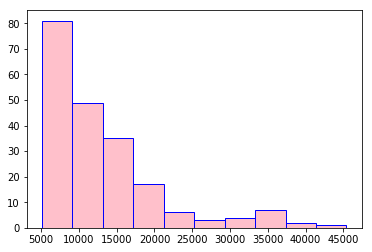

In [16]:
#histogram of price
plt.hist(tab_join['price'], 
         facecolor='pink', #fill color
         edgecolor='blue', #line color
         bins=10) #lebar bar
plt.show()

In [17]:
# violin price and horse distribution
pricehorse=tab_join[['width','height']]
arr=np.array(pricehorse)
arr

array([[64.1, 48.8],
       [64.1, 48.8],
       [65.5, 52.4],
       [66.2, 54.3],
       [66.4, 54.3],
       [66.3, 53.1],
       [71.4, 55.7],
       [71.4, 55.7],
       [71.4, 55.9],
       [67.9, 52. ],
       [64.8, 54.3],
       [64.8, 54.3],
       [64.8, 54.3],
       [64.8, 54.3],
       [66.9, 55.7],
       [66.9, 55.7],
       [67.9, 53.7],
       [70.9, 56.3],
       [60.3, 53.2],
       [63.6, 52. ],
       [63.6, 52. ],
       [63.8, 50.8],
       [63.8, 50.8],
       [63.8, 50.8],
       [63.8, 50.6],
       [63.8, 50.6],
       [63.8, 50.6],
       [63.8, 50.6],
       [64.6, 59.8],
       [66.3, 50.2],
       [63.9, 50.8],
       [63.9, 50.8],
       [64. , 52.6],
       [64. , 52.6],
       [64. , 52.6],
       [64. , 54.5],
       [63.9, 58.3],
       [65.2, 53.3],
       [65.2, 53.3],
       [65.2, 54.1],
       [62.5, 54.1],
       [65.2, 54.1],
       [66. , 51. ],
       [61.8, 53.5],
       [63.6, 52. ],
       [63.6, 52. ],
       [65.2, 51.4],
       [69.6,

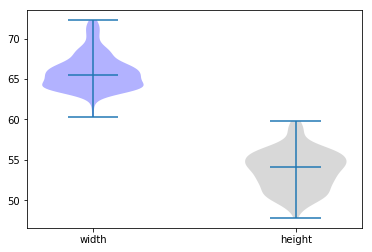

In [18]:
colors = ['blue', 'grey']
vp = plt.violinplot(arr,
                    showmedians=True)

plt.xticks([1, 2], ['width', 'height'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

plt.show()

# PART 2

### 1. Car brand with highest price 

In [19]:
merk=tab_join[['make', 'price']]
top_merk=merk.groupby('make').max().sort_values('price',ascending=False).head(1)
top_merk

,price
make,
mercedes-benz,45400.0


### 2. Maximum horsepower for car with 6 cylinder engine 

In [20]:
cyl_6=tab_join[tab_join['cylinder']=='six']
cyl_6[['horsepower']].sort_values('horsepower',ascending=False).head(1)

,horsepower
126,207.0


### 3. Average peak-rpm for ‘turbo’ style aspiration car 

In [21]:
turbo=tab_join[tab_join['aspiration']=='turbo']
turbo[['peak-rpm']].mean()

peak-rpm    4939.189189
dtype: float64

### 4. Average price based on body-style

In [22]:
avg=tab_join[['body-style','price']]
avg.groupby('body-style').mean().sort_values('price',ascending=False)

,price
body-style,
hardtop,22208.500000
convertible,21890.500000
sedan,14372.989583
wagon,12371.960000
hatchback,9967.085714


### 5. Average price based on body-style only for Honda car (make=Honda)

In [23]:
honda=tab_join[tab_join['make']=='honda']
honda[['body-style','price']].groupby('body-style').mean().sort_values('price',ascending=False)

,price
body-style,
sedan,9945.000000
wagon,7295.000000
hatchback,7054.428571
